In [1]:
import warnings
import sys
import os
warnings.filterwarnings('ignore')

In [2]:
root_dir = os.path.abspath("..")

# Add the root directory to the Python path
if root_dir not in sys.path:
    sys.path.append(root_dir)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.data.make_dataset as make_ds
# import NBA_AMLAA_Assignment1.src.data.make_dataset as make_ds
# from src.data.make_dataset import clean_data , report_missing_values
# from src.features.build_features import pre_processing, apply_pca, important_features
# from src.models.train_model import train_model
# from src.models.predict_model import predict_test_data, preprocess_test_data
import src.visualization.visualize as viz
from nba_drafted.make_dataset import clean_data , report_missing_values
from nba_drafted.build_features import pre_processing, apply_pca, important_features
from nba_drafted.train_model import train_model
from nba_drafted.predict_model import predict_test_data, preprocess_test_data

In [4]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)

In [5]:
train_filepath = '../data/raw/train.csv'
train_df = pd.read_csv(train_filepath, low_memory=False)
train_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,b2716b2d-3422-4959-9fe7-fe496414a4e8,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,bb387960-e3a0-4ffd-96ae-184bad07cb8a,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,89bbdf11-eadd-4de4-95e5-03f7e2874aa1,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0c87ada8-8446-4ea2-a05b-bd07aed5f37a,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,84661e00-ad20-4308-817e-efa8da52a86c,0.0


In [ ]:
copy_df = train_df.copy()

In [ ]:
def eda(df):
  df.columns = [train_col.lower() for train_col in df.columns]
  #  Top 10 Teams
  top_10 = df['team'].value_counts().nlargest(10).index
  top_10 = df[df['team'].isin(top_10)]
  no_drafted = top_10[top_10['drafted'] == 0]

  fig = px.bar(no_drafted, x='team', title='Top Team with Undrafted Players Analysis',
              labels={'team': 'Top most Teams'}, color_discrete_sequence=['burlywood'])
  fig.update_layout(
      width=800,
      height=500,
      xaxis_title='team',
      yaxis_title='Counts of Undrafted Players',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()

  yearly_ftp = df.groupby('year')['ft_per'].sum().reset_index()
  yearly_ftp['year'] = pd.to_datetime(yearly_ftp['year'], format='%Y').dt.year
  fig = px.line(yearly_ftp,
                x='year',
                y='ft_per',
                title='Free Throws Attempts Yearly Analysis',
                labels={'ft_per': 'Free Throws Percentage', 'year': 'Year'},
                template='plotly_white')

  fig.add_scatter(x=yearly_ftp['year'],
                  y=yearly_ftp['ft_per'].rolling(window=2).mean(),
                  mode='lines',
                  line=dict(color='red', dash='dash'),
                  name='Trendline')

  # Customize the layout
  fig.update_layout(
      width=800,
      height=500,
      xaxis_title='Year',
      yaxis_title='Free Throws Percentage',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()


  top_5 = df['team'].value_counts().nlargest(5).index
  top_5 = df[df['team'].isin(top_5)]
  yearly_team = top_5.groupby(['year','team'])['gp'].sum().reset_index()
  yearly_team['year'] = pd.to_datetime(yearly_team['year'], format='%Y').dt.year
  yearly_team=yearly_team[yearly_team['year'] >=2016]
  fig = px.bar(yearly_team, x='team', y='gp', facet_col='year', barmode='group', title='Top 5 teams with number of games played across seasons 2016-18',
              labels={'gp': 'Number of Games Played', 'team': 'Top 5 Teams',}, color_discrete_sequence=['lightcoral'])

  fig.update_layout(
      width=1100,
      height=500,
      xaxis_title='Top 5 Teams',
      yaxis_title='Number of Games Played',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()

  top_10 = df['team'].value_counts().nlargest(10).index
  top_10_df = df[df['team'].isin(top_10)]

  perf_team = top_10_df.groupby('team')[['twop_per', 'tp_per']].sum().reset_index()
  perf_team = perf_team.melt(id_vars='team',
                                    value_vars=['twop_per', 'tp_per'],
                                    var_name='Pointer Type',
                                    value_name='Total')
  fig = px.bar(perf_team, x='team', y='Total', color='Pointer Type',barmode='group',
              title='Top 10 Teams Performance Metrics: Two and Three Pointers',labels={'team': 'Team', 'Total': 'Total Points'},color_discrete_sequence=['lightcoral', 'deeppink'])

  # Update layout
  fig.update_layout(
      width=1100,
      height=500,
      xaxis_title='Top 10 Teams',
      yaxis_title='Total Points',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()

  top_10_a = df['team'].value_counts().nlargest(10).index
  top_10_df1 = df[df['team'].isin(top_10_a)]

  perf_team1 = top_10_df1.groupby('team')[['stl_per', 'blk_per']].sum().reset_index()
  perf_team1 = perf_team1.melt(id_vars='team',
                                    value_vars=['stl_per', 'blk_per'],
                                    var_name='Pointer Type',
                                    value_name='Total')
  fig = px.bar(perf_team1, x='team', y='Total', color='Pointer Type',barmode='group',
              title='Top 10 Teams Performance Metrics: Steals and Blocks Percentages',labels={'team': 'Team', 'Total': 'Total steal and block points'},color_discrete_sequence=['lightgreen', 'olive'])

  # Update layout
  fig.update_layout(
      width=1100,
      height=500,
      xaxis_title='Top 10 Teams',
      yaxis_title='Total Points',
      xaxis=dict(tickmode='linear'),
      template='plotly_white'
  )

  # Show the plot
  fig.show()


  top_101 = df['team'].value_counts().nlargest(10).index
  top_10 = df[df['team'].isin(top_101)]
  drafted = top_10[top_10['drafted'] ==1]
  counts = drafted['team'].value_counts().reset_index()
  counts.columns = ['team', 'count']

  fig = px.pie(counts, names='team', values='count', color='team',color_discrete_sequence=["blue","red"],
                title='Top Teams with Drafted Players')
  fig.update_layout(
        width=800,
        height=500,
          xaxis_title='Team',
          yaxis_title='Counts'
      )
  fig.show()

In [ ]:
eda(copy_df)

In [6]:
train_df_clean = make_ds.clean_data(train_df)

Initial DataFrame shape: (46618, 64)
Imputing missing values...
Shape after imputing missing values: (46618, 64)
Dropping unnecessary columns...
Shape after dropping unnecessary columns: (46618, 60)
Dropping columns with high percentage of missing values...
Shape after dropping high missing columns: (46618, 57)
Handling duplicates...
Shape after handling duplicates: (46617, 57)
Filtering 'yr' values: ['Jr', 'Fr', 'So', 'Sr']
Shape after filtering 'yr' values: (46610, 57)
Encoded 'yr' as categorical codes.
Encoding categorical columns...
Shape after encoding categorical columns: (46610, 57)
Final DataFrame shape: (46610, 57)


In [7]:
make_ds.report_missing_values(train_df_clean)

,missing_values,percentage_missing
team,0,0.000000
conf,0,0.000000
GP,0,0.000000
Min_per,0,0.000000
Ortg,0,0.000000
usg,0,0.000000
eFG,0,0.000000
TS_per,0,0.000000
ORB_per,0,0.000000
DRB_per,0,0.000000


In [8]:
train_df_clean.dropna(inplace= True)

In [9]:
train_df_clean.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,porpag,adjoe,pfr,year,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,1.590953e-07,0.002596,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,2,0.258086,89.3938,2.5,2009,1.823646,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0
1,2.373403e-07,0.004472,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,2,1.334920,100.0660,3.4,2009,1.631621,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0
2,8.064561e-03,0.027501,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,3,2.274070,104.1070,1.7,2009,1.081662,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0
3,4.335905e-08,0.005738,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,3,0.552857,93.2086,2.0,2009,0.942830,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0
4,9.649680e-08,0.000831,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,3,1.060130,97.8554,3.8,2009,0.491229,18.0,32.0,8.0,26.0,0.562907,0.322901,0.0,0.0,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0


In [10]:
metadata_df = pd.read_csv('../data/raw/metadata.csv')
metadata_df.head()

,feature,name,description
0,1,team,Name of team
1,2,conf,Name of conference
2,3,GP,Games played
3,4,Min_per,Player's percentage of available team minutes played
4,5,ORtg,"ORtg - Offensive Rating (available since the 1977-78 season in the NBA); for players it is points produced per 100 posessions, while for teams it is points scored per 100 possessions. This rating was developed by Dean Oliver, author of Basketball on Paper. Please see the article Calculating Individual Offensive and Defensive Ratings for more information."


In [11]:
train_df_processed = pre_processing(train_df_clean)
print("Processed data snapshot:")
print(train_df_processed.head())

Processed data snapshot:
       team      conf        GP   Min_per      Ortg       usg       eFG  \
0 -0.416660 -0.483228  0.242042 -0.281273  0.182140 -0.254627 -0.108615   
1 -0.416657 -0.352413  1.037497  0.839800  0.547775 -0.530343  0.442064   
2 -0.064344  1.252960  0.341474  1.236103  0.145577  0.588739  0.069382   
3 -0.416665 -0.264199  0.639769  0.254271  0.195436 -0.351939  0.508814   
4 -0.416663 -0.606278  0.938065  0.671996  0.155548  0.621176  0.464314   

     TS_per   ORB_per   DRB_per   AST_per    TO_per       FTM       FTA  \
0 -0.184900 -0.411101 -0.729939  0.518464 -0.348753 -0.626998 -0.676151   
1  0.400761 -0.187195 -0.574301  0.284444 -0.061595 -0.090949 -0.058534   
2  0.021975 -0.360214 -0.418663  0.401454 -0.381571  0.311088  0.379775   
3  0.354723 -0.156663 -0.290490  0.295081  0.266585 -0.519788 -0.417150   
4  0.390854  0.270793  0.551788 -0.289969  0.176335  0.820334  1.316163   

     FT_per     twoPM     twoPA  twoP_per       TPM       TPA    TP_per  

In [12]:
top_features = important_features(train_df_processed,target_col='drafted',n_top=20)
top_features

Top Features:
 Index(['team', 'dporpag', 'porpag', 'stops', 'gbpm', 'bpm', 'ogbpm', 'adjoe',
       'twoPA', 'twoPM', 'obpm', 'FTA', 'adrtg', 'conf', 'pts', 'dunksmade',
       'dunksmiss_dunksmade', 'dreb', 'dgbpm', 'mp'],
      dtype='object')


Index(['team', 'dporpag', 'porpag', 'stops', 'gbpm', 'bpm', 'ogbpm', 'adjoe',
       'twoPA', 'twoPM', 'obpm', 'FTA', 'adrtg', 'conf', 'pts', 'dunksmade',
       'dunksmiss_dunksmade', 'dreb', 'dgbpm', 'mp'],
      dtype='object')

In [13]:
from sklearn.ensemble import RandomForestClassifier

Number of PCA components used: 35
Training random_forest...


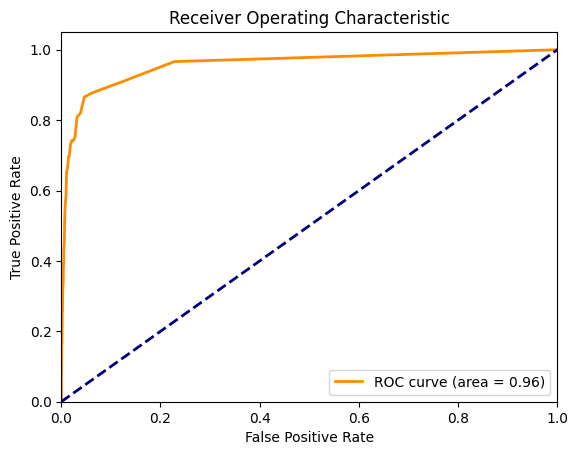

Tuning hyperparameters for random_forest using GridSearchCV...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


KeyboardInterrupt: 

In [14]:
random_forest_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20],        
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],    
    'bootstrap': [True, False]        
}

# Call the train_model function
model_rf, pca_model_rf, X_validation_rf, y_val_rf = train_model(
    train_df_processed,           
    random_forest_model,          
    'random_forest',              
    'drafted',                    
    param_grid=param_grid_rf      
)

In [ ]:
from src.models.predict_model import load_models, predict_test_data

In [ ]:
test_filepath = '../data/raw/test.csv'  
test_df = pd.read_csv(test_filepath, low_memory= False)

In [ ]:
model_filepath = 'logistic_regression_model.pkl'
pca_filepath = 'logistic_regression_pca.pkl'
y_test_pred = predict_test_data(test_filepath, model_filepath=model_filepath, pca_filepath=pca_filepath)
print("Predicted probabilities (first 10):", y_test_pred[:10])

In [ ]:
y_test_pred

In [ ]:
sample_submission = pd.read_csv('../data/raw/test.csv')
sample_submission.head()

In [ ]:
submission_df = pd.DataFrame({
    'player_id': sample_submission['player_id'], 
    'drafted': y_test_pred })
submission_df.to_csv('test_submission.csv', index=False)
